## Observations and Insights

## Look across all the generated figures and tables and write at least three observations or inferences that can be made from the data.

### Observation 1
### Based off of Mouse-l509's treatment with Capomulin, the tumor volume decreased without affecting his                        weight. Will also need to make a comparison with a female mouse to see if the same outcome occured with this          medication.

### Observation 2
### The mouse distribution for each drug regimen was uneven. The maximum number of mice for Capomulin was            230 and the minimum was 161 for the Propriva regimen. The study might be more concrete if the number of mice        was the same for all regimens.

### Observation 3
###

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

In [3]:
# Importing study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [52]:
# Generate a summary statistics table of the tumor volume for each drug regimen.
# It should consist of mean, median, variance, standard deviation, and SEM


# Make dataframe with drug regimen and tumor volume. Set drug regimen as index.
reg_df = mouse_study_df[['Drug Regimen', 'Tumor Volume (mm3)']]
reg_df.set_index('Drug Regimen')

# Make dataframe of summary stats
tv_mean = reg_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tv_mean_df = pd.DataFrame(tv_mean)

tv_median = reg_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tv_median_df = pd.DataFrame(tv_median)

tv_var = reg_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tv_var_df = pd.DataFrame(tv_var)

tv_std = reg_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tv_std_df = pd.DataFrame(tv_std)

tv_sem = reg_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tv_sem_df = pd.DataFrame(tv_sem)

# Merge summary stats onto one dataframe
tv_stats1 = pd.merge(tv_mean,tv_median, on='Drug Regimen')
tv_stats1

tv_stats2 = pd.merge(tv_stats1, tv_var, on='Drug Regimen')
tv_stats2

tv_stats3 = pd.merge(tv_stats2, tv_std, on='Drug Regimen')
tv_stats3

tv_stats4 = pd.merge(tv_stats3, tv_sem, on='Drug Regimen')
tv_stats4

# Rename summary stats columns
tv_stats_rename = tv_stats4.rename(columns={'Tumor Volume (mm3)_x': 'TV-Mean (mm3)',
                                            'Tumor Volume (mm3)_y': 'TV-Median (mm3)',
                                            'Tumor Volume (mm3)_x': 'TV-Varience (mm3)',
                                            'Tumor Volume (mm3)_y': 'TV-StDev (mm3)',
                                            'Tumor Volume (mm3)': 'TV-SEM (mm3)'})
tv_stats_rename

,TV-Varience (mm3),TV-StDev (mm3),TV-Varience (mm3),TV-StDev (mm3),TV-SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Mouse Count')

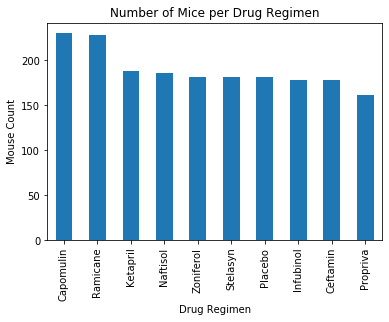

In [5]:
# Generate a bar plot using Pandas's DataFrame.plot() that shows the number of data points for each treatment regimen.

# Make a dataframe of the total mice per drug regimen while creating bar chart
mice_total_df = mouse_study_df["Drug Regimen"].value_counts().plot(kind='bar', title="Number of Mice per Drug Regimen")

# Make a labels for x and y
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

Text(0, 0.5, 'Mouse count')

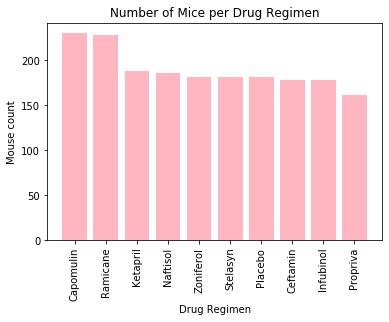

In [6]:
# Generate a bar plot using both Matplotlib's pyplot that shows the number of data points for each treatment regimen.

# Make variables for drug regimen and mouse count
drugs = ['Capomulin','Ramicane', 'Ketapril', 'Naftisol','Zoniferol', 
         'Stelasyn','Placebo','Ceftamin','Infubinol', 'Propriva']
mice_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(mice_count))

# Creating bar chart based on values above. Add tick marks.
plt.bar(x_axis, mice_count, color="lightpink", align="center",)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation='vertical')

# Label the chart's title, x and y axises
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse count")

## Pie plots

Text(0.5, 1.0, 'Percentage of Female & Male Mice in Study')

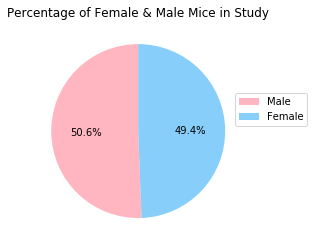

In [9]:
# Generate a pie plot using Matplotlib's pyplot that shows the distribution of female or male mice in the study.

# Make variables for sex and mouse population lables
sex = ['Male','Female']
mouse_samp = [958,935]

# Colors for each section
colors = ['lightpink', 'lightskyblue']

# Creating pie chart based on values above with percentages. Add title.
plt.pie(mouse_samp, colors=colors, autopct="%1.1f%%", startangle=90)
plt.legend(loc='upper right', labels=sex, bbox_to_anchor=(1.3,0.7))
plt.title("Percentage of Female & Male Mice in Study")

Text(0.5, 1.0, 'Percentage of Female & Male Mice in Study')

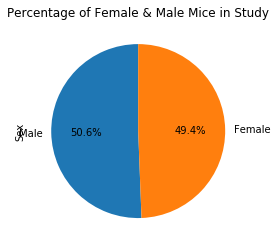

In [10]:
# Generate a pie plot using both Pandas's DataFrame.plot() shows the distribution of female or male mice in the study.

mouse_study_df['Sex'].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=90)

plt.title("Percentage of Female & Male Mice in Study")

## Quartiles, outliers and boxplots

In [78]:
# create dataframe for Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = mouse_study_df[['Mouse ID', 'Drug Regimen', 'Timepoint','Tumor Volume (mm3)']]
regimens = pd.DataFrame(regimens)
regimens_grouped = regimens.groupby(['Drug Regimen','Mouse ID'])
regimens_timemax = regimens_grouped.max()
regimens_timemax.iloc([0,1,2,8])
# four_reg_time = four_regimens['Timepoint'].max()
# four_reg_time

TypeError: unhashable type: 'list'

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# The four Drug Regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Calulating quartiles for final tumor volume (mm3). Final timepoint is at 45.
quartiles = mouse_study_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume (mm3) is: {lowerq}")
print(f"The upper quartile of final tumor volume (mm3) is: {upperq}")
print(f"The interquartile range of final tumor volume (mm3) is: {iqr}")
print(f"The the median of final tumor volume (mm3) is: {quartiles[0.5]} ")

# Checking for outliers for final tumor volume (mm3). Final timepoint is at 45.

# Still working on getting final tumor volume
# Set Timepoint to index or groupby it. and .loc == [45], then keep the stuff below for now?

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = mouse_study_df.loc[(mouse_study_df['Tumor Volume (mm3)'] < lower_bound) | 
                                       (mouse_study_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

The lower quartile of final tumor volume (mm3) is: 45.0
The upper quartile of final tumor volume (mm3) is: 56.29220039
The interquartile range of final tumor volume (mm3) is: 11.292200389999998
The the median of final tumor volume (mm3) is: 48.95147442 
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
567,a818,Naftisol,Female,12,28,45,74.997764,2
679,c402,Stelasyn,Female,1,27,45,74.040390,3
850,f545,Zoniferol,Female,20,26,45,73.324432,1
930,h246,Ketapril,Male,13,30,45,74.104086,2
1043,k382,Ketapril,Male,22,29,45,73.715619,4


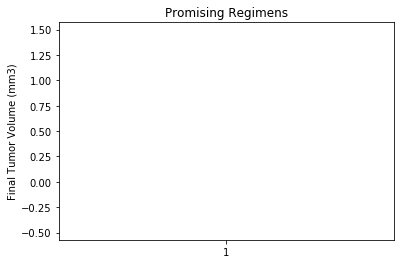

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Still working on getting final tumor volumeFinal timepoint is at 45.
volume = []

fig1, ax1 = plt.subplots()
ax1.set_title('Promising Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(volume)
plt.show()

## Line and scatter plots

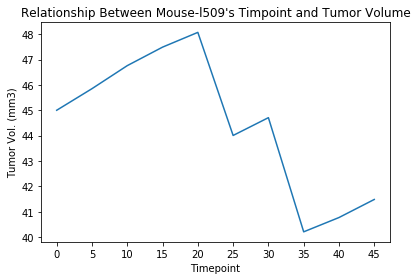

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse(mouse ID l509) treated with Capomulin

# Create df for mouse 1509
mouse_l509_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "l509"]
mouse_l509_df

# Filter mousel509 df for time point and tumor vol
l509_time_vol = mouse_l509_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']]
l509_time_vol = pd.DataFrame(l509_time_vol)

# Set Mouse ID as index
l509_time_vol.set_index(['Mouse ID'])

# Set axises for line plot
x_axis = l509_time_vol["Timepoint"]
y_axis = l509_time_vol["Tumor Volume (mm3)"]

# Make line plot
plt.plot(x_axis,y_axis)
tick_points = [value for value in x_axis]
plt.xticks(tick_points,x_axis)

# Make labels for the graph
plt.title("Relationship Between Mouse-l509's Timpoint and Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol. (mm3)")

plt.tight_layout()
# plt.savefig('./lyr_monthly_sales.png')
plt.show()

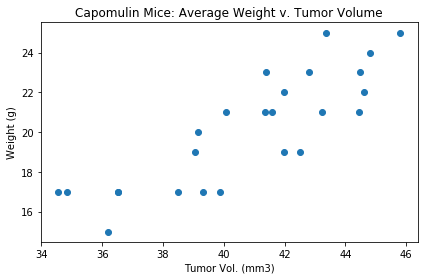

In [135]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin"]

capomulin_vol_g = capomulin_df[['Mouse ID', 'Weight (g)','Tumor Volume (mm3)']]
capomulin_vol_g= pd.DataFrame(capomulin_vol_g)

# Groupby Mouse ID and calculate tumor volume and weight average
avg_capomulin_vol = capomulin_vol_g.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
avg_capomulin_vol = pd.DataFrame(avg_capomulin_vol)

avg_capomulin_g = capomulin_vol_g.groupby('Mouse ID').mean()['Weight (g)']
avg_capomulin_g = pd.DataFrame(avg_capomulin_g)

# Merge the two dataframes
avg_capomulin_volg = pd.merge(avg_capomulin_vol, avg_capomulin_g, on="Mouse ID")
avg_capomulin_volg

# Set axises for line plot
x_axis = avg_capomulin_volg["Tumor Volume (mm3)"]
y_axis = avg_capomulin_volg['Weight (g)']

# Make scatter plot and label graph
plt.scatter(x_axis,y_axis)
plt.title("Capomulin Mice: Average Weight v. Tumor Volume")
plt.xlabel("Tumor Vol. (mm3)")
plt.ylabel("Weight (g)")

plt.tight_layout()
# plt.savefig('./lyr_monthly_sales.png')
plt.show()

The correlation between weight (g) and tumor volume (mm3) is 0.84


Text(0, 0.5, 'Weight (g)')

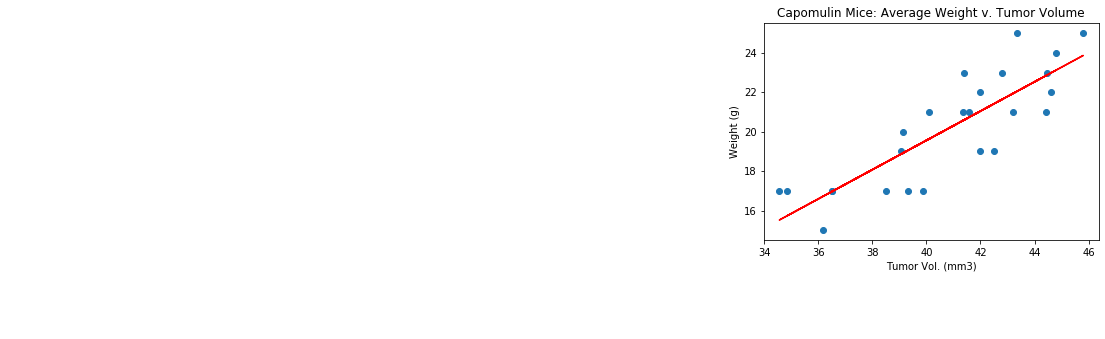

In [146]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation coefficient between weight and average tumor volume
correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f'The correlation between weight (g) and tumor volume (mm3) is {round(correlation[0],2)}')

# Make linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

# Copy scatter plot from above and combine linear regression model
plt.scatter(x_axis,y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.annotate(line_eq,(6,10), fontsize=15, color='red')
plt.title("Capomulin Mice: Average Weight v. Tumor Volume")
plt.xlabel("Tumor Vol. (mm3)")
plt.ylabel("Weight (g)")